# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload Clinic data

In [2]:
path ='../../../Data_preprocessing/Prediction OS/Clinical_data_categorized_OS.csv' 
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Unnamed: 0.1,Cohort,Arm,Sex,Age,MSKCC,IMDC,Sarc,Rhab,Sarc_or_Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,OS,TM_TC_Ratio,ImmunoPhenotype
0,0,0,0,1,1,73,1,-1,0.0,0.0,0.0,2.0,808,3.636364,7.594521,1.368624,1
1,1,1,0,1,1,55,1,-1,0.0,0.0,0.0,2.0,1826,-13.709677,9.369863,1.524401,0
2,2,2,0,1,1,51,2,-1,0.0,0.0,0.0,1.0,1541,26.666667,23.441096,1.046688,1
3,3,3,0,1,1,70,0,-1,0.0,0.0,0.0,3.0,-1,5.714286,10.487671,-1.000000,-1
4,4,4,0,1,1,59,0,-1,0.0,0.0,0.0,3.0,376,-4.545455,49.052055,0.917459,1


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.OS[i]<20: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

data = data.drop('OS', axis=1) # As we won't need this column any more, I deleted it.

X = data.iloc[:,2:16] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Numero de pacientes: ',len(Y))

     Cohort  Arm  Sex  Age  MSKCC  IMDC  Sarc  Rhab  Sarc_or_Rhab  \
0         0    1    1   73      1    -1   0.0   0.0           0.0   
1         0    1    1   55      1    -1   0.0   0.0           0.0   
2         0    1    1   51      2    -1   0.0   0.0           0.0   
3         0    1    1   70      0    -1   0.0   0.0           0.0   
4         0    1    1   59      0    -1   0.0   0.0           0.0   
..      ...  ...  ...  ...    ...   ...   ...   ...           ...   
453       1    0    0   62      0     0   0.0   0.0           0.0   
454       1    1    1   65      1     1   0.0   0.0           0.0   
455       1    0    1   68      1     1   0.0   0.0           0.0   
456       1    1    0   48      0     1   0.0   0.0           0.0   
457       1    1    0   76      1     1   0.0   0.0           0.0   

     Number_of_Prior_Therapies  \
0                          2.0   
1                          2.0   
2                          1.0   
3                          3.0   
4

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 366
Target column size of the training set: 366
Test set size: 92
Target column size of the test set: 92


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation. 
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )
# Fit the model with the best parameters
clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Best estimate of parameters according to GridSearchCV:
RandomForestClassifier(max_depth=5, n_estimators=10, random_state=125)


In [7]:
print("Best result of the cross validation of the model with the best paramters: " +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters: 0.7322102924842651


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(len(yTrain)) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.8360655737704918
Final accuracy on the testing dataset: 0.6956521739130435


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[131  32]
 [ 28 175]]
Input data:  [1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]
Prediction:        [1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 

In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       163
           1       0.85      0.86      0.85       203

    accuracy                           0.84       366
   macro avg       0.83      0.83      0.83       366
weighted avg       0.84      0.84      0.84       366



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[24 18]
 [10 40]]
Input data:  [0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0]
Prediction:        [0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        42
           1       0.69      0.80      0.74        50

    accuracy                           0.70        92
   macro avg       0.70      0.69      0.69        92
weighted avg       0.70      0.70      0.69        92



### 7. Results visualizaton

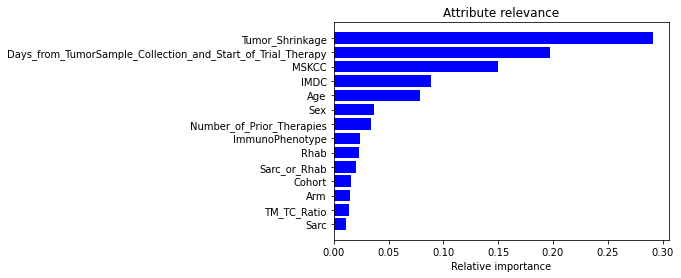

Cohort = 0.015934029689753743
Arm = 0.015189217258836273
Sex = 0.03710315802268393
Age = 0.0784507935084574
MSKCC = 0.14961392697331358
IMDC = 0.0891055615067485
Sarc = 0.011165842056016274
Rhab = 0.02298369902248978
Sarc_or_Rhab = 0.020663218420811834
Number_of_Prior_Therapies = 0.03405596185110908
Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy = 0.1970450325028839
Tumor_Shrinkage = 0.2907742848551934
TM_TC_Ratio = 0.014325175332201196
ImmunoPhenotype = 0.023590098999501145


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.